In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import mpl_toolkits
import matplotlib.pyplot as mlt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline
from sklearn import preprocessing

In [154]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [155]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [156]:
dt = df.iloc[:,2:21]

In [157]:
df2 = preprocessing.scale(dt)

{'whiskers': [<matplotlib.lines.Line2D at 0x2010500b160>,
 'caps': [<matplotlib.lines.Line2D at 0x2010500ba20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20104ffefd0>],
 'medians': [<matplotlib.lines.Line2D at 0x201050132b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x201050136d8>],
 'means': []}

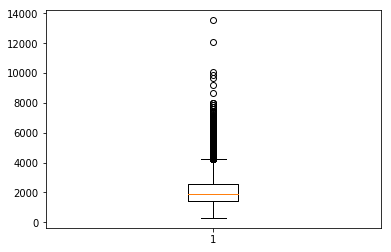

In [158]:
mlt.boxplot(dt["sqft_living"])

In [159]:
# Normalisation

In [160]:
dt = (dt- dt.min())/(dt.max()-dt.min())
dt.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  0.019266  0.090909    0.12500     0.067170  0.003108     0.0         0.0   
1  0.060721  0.090909    0.28125     0.172075  0.004072     0.4         0.0   
2  0.013770  0.060606    0.12500     0.036226  0.005743     0.0         0.0   
3  0.069377  0.121212    0.37500     0.126038  0.002714     0.0         0.0   
4  0.057049  0.090909    0.25000     0.104906  0.004579     0.0         0.0   

   view  condition     grade  sqft_above  sqft_basement  yr_built  \
0   0.0        0.5  0.500000    0.097588       0.000000  0.478261   
1   0.0        0.5  0.500000    0.206140       0.082988  0.443478   
2   0.0        0.5  0.416667    0.052632       0.000000  0.286957   
3   0.0        1.0  0.500000    0.083333       0.188797  0.565217   
4   0.0        0.5  0.583333    0.152412       0.000000  0.756522   

   yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15  
0      0.000000  0.893939  0.571498  0.217608       0.161934    0.005742  
1      0.988089  0.626263  0.908959  0.166113       0.222165    0.008027  
2      0.000000  0.136364  0.936143  0.237542       0.399415    0.008513  
3      0.000000  0.681818  0.586939  0.104651       0.165376    0.004996  
4      0.000000  0.368687  0.741354  0.393688       0.241094    0.007871

In [161]:
# Feature Selection

In [162]:
from sklearn.feature_selection import VarianceThreshold

In [163]:
var = VarianceThreshold()
array = var.fit_transform(dt)
array

array([[0.01926557, 0.09090909, 0.125     , ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.06072131, 0.09090909, 0.28125   , ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.01377049, 0.06060606, 0.125     , ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.04289849, 0.06060606, 0.09375   , ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.04262295, 0.09090909, 0.3125    , ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.03278689, 0.06060606, 0.09375   , ..., 0.18272425, 0.10686629,
        0.00081098]])

In [164]:
# Heat Map

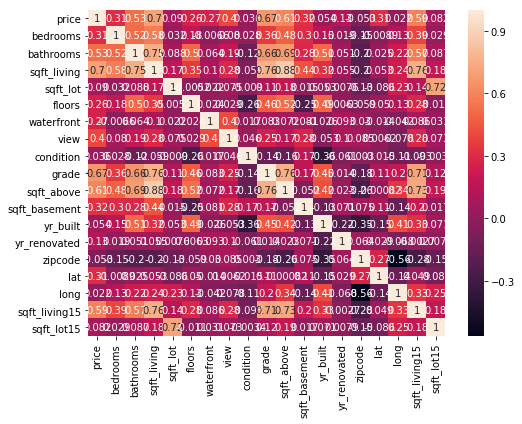

In [165]:
mlt.figure(figsize=(8,6)) 
sns.heatmap(dt.corr(),annot=True)

In [166]:
# Checking Skewness

In [167]:
dt = dt["sqft_living"]
dt.head()

0    0.067170
1    0.172075
2    0.036226
3    0.126038
4    0.104906
Name: sqft_living, dtype: float64

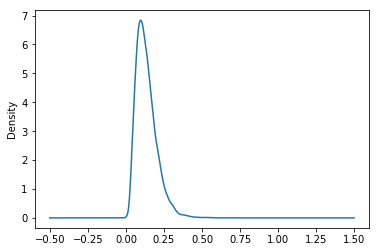

In [168]:
dt.plot(kind="kde")

In [169]:
dt.mean() , dt.std()

(0.1350867725486669, 0.06931629411674058)

In [170]:
df1 = np.power(dt,1/2)
df1.mean() , df1.std()

(0.35635125150470054, 0.09000518272470114)

In [171]:
df2 = np.power(dt,1/3)
df2.mean() , df2.std()

(0.4990794811873782, 0.08432832764102229)

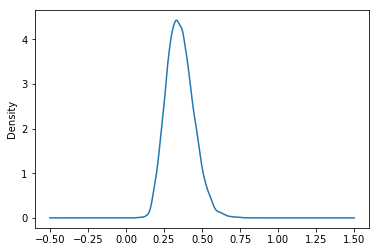

In [172]:
# taking df1 as its mean and std is much more near to 0
df1.plot(kind='kde')

In [173]:
#Scaling

In [174]:
df1=preprocessing.scale(df1)
df1

array([-1.079739  ,  0.64962823, -1.84459058, ..., -1.35139141,
       -0.46574561, -1.35139141])

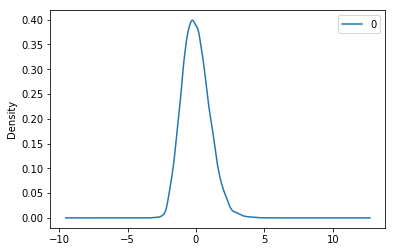

In [175]:
df1=pd.DataFrame(df1)
df1.plot(kind='kde')

In [176]:
# linear regression

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
target = df.iloc[:,2]

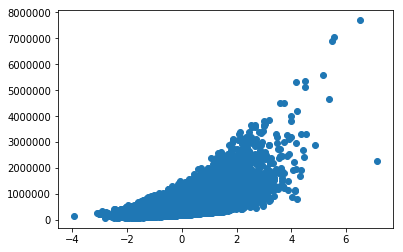

In [179]:
mlt.scatter(x = df1,y = target )

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
df1_train,df1_test,target_train,target_test  = train_test_split(df1,target,test_size = 0.2)

In [182]:
reg = LinearRegression()
reg.fit(df1_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
reg.intercept_ , reg.coef_

(541007.1652324481, array([242090.58175281]))

In [184]:
arr  = reg.predict(df1_test)

In [185]:
arr

array([554423.83798719, 554423.83798719, 722482.40357305, ...,
       110205.34257467, 528804.74356054, 463047.95340522])

In [186]:
X = df.drop(['price','date'],axis=1)
y = df['price']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [188]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [189]:
y_pred = reg.predict(X_test)
y_pred

array([456391.80727039, 559783.8408998 , 648381.86121181, ...,
       212061.12857928, 946901.53205601, 726729.17062278])

In [190]:
a = pd.DataFrame({"actual":y_test,"predicted":y_pred})

In [194]:
a

actual     predicted    differences
6594    460000.0  4.563918e+05    3608.192730
6284    499000.0  5.597838e+05  -60783.840900
18015   630000.0  6.483819e+05  -18381.861212
10384   695000.0  7.794580e+05  -84457.993183
10691   460000.0  4.566894e+05    3310.581102
1765    390000.0  5.288371e+05 -138837.140096
5055    475000.0  6.847082e+05 -209708.225813
18915   185000.0  1.012250e+05   83774.990694
8409    871000.0  7.711590e+05   99840.974339
4788    716100.0  6.340225e+05   82077.523641
17206   420000.0  5.300697e+05 -110069.721839
14553   365000.0  5.430146e+05 -178014.593158
3333    368500.0  6.047384e+05 -236238.356635
14462   417000.0  6.554576e+05 -238457.580426
8064    417000.0  4.671210e+05  -50120.997007
2807    522000.0  5.029336e+05   19066.418547
7207    655000.0  5.951359e+05   59864.105723
4990    550000.0  5.519203e+05   -1920.313122
12140   450000.0  6.875233e+05 -237523.335258
2192    750000.0  7.691012e+05  -19101.245494
17584   395350.0  4.235387e+05  -28188.737595
1858    740000.0  6.108713e+05  129128.721925
2527    627000.0  4.916428e+05  135357.225183
16535   460000.0  7.505240e+05 -290524.036717
274     331000.0  3.531789e+05  -22178.855906
19649  1264000.0  9.145655e+05  349434.529371
10011   530000.0  4.681347e+05   61865.321795
4218   1875000.0  2.007286e+06 -132286.046378
20611   732000.0  5.332152e+05  198784.798102
11252   215000.0  1.635084e+05   51491.611119
...          ...           ...            ...
10118   319000.0  4.268831e+05 -107883.057337
2128    235000.0  1.496883e+05   85311.669474
3681    275000.0  2.035026e+05   71497.437803
10350   565000.0  7.490796e+05 -184079.604070
16209   375000.0  4.480412e+05  -73041.222476
4124    277500.0  1.998580e+05   77641.958172
6737    269950.0  1.639250e+05  106025.030396
9478    850000.0  9.566851e+05 -106685.112866
7403    269000.0  2.280761e+05   40923.861775
16365   262500.0  2.038496e+05   58650.389097
5830    759000.0  7.034126e+05   55587.401909
9439    248000.0  3.520292e+05 -104029.244539
16469   345000.0  4.403293e+05  -95329.304981
3605    328000.0  1.882920e+05  139708.022674
8537    599000.0  6.596225e+05  -60622.457817
6595    445000.0  4.517873e+05   -6787.272331
4833    550000.0  4.455165e+05  104483.512477
3116    900000.0  1.144874e+06 -244873.663385
18053   540000.0  5.903266e+05  -50326.619497
13530   229999.0  2.095106e+05   20488.444455
14778   740000.0  1.051821e+06 -311821.222026
1130    332500.0  4.666742e+05 -134174.177481
21504   810000.0  8.356124e+05  -25612.440920
19114   675000.0  8.031219e+05 -128121.866377
8916    740000.0  3.973199e+05  342680.071514
14791   713414.0  1.005085e+06 -291671.152582
7955    299950.0  2.134535e+05   86496.503535
5704    276500.0  2.120611e+05   64438.871421
11465  1655000.0  9.469015e+05  708098.467944
4591    539000.0  7.267292e+05 -187729.170623

[6484 rows x 3 columns]